# Census Income Data Set 

By

Bhargav Nallani C
Sri Sai Manish Kondapalli
Sai Krishna Nadella
Tarun Singh Thakur

* Original Dataset : https://archive.ics.uci.edu/ml/datasets/Census-Income+(KDD)
* Dataset Used : https://archive.ics.uci.edu/ml/datasets/census+income

This Data Set was extracted from 1994 Census Database by Mr. Barry Becker. A set of 48k records were extracted using the following conditions 

((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

* AAGE : Average Age
* AGI : Adjusted Gross Income
* AFNLWGT : Adjusted Final Weight
* HRSWK : Hours per Week



### Problem Statement

A set of 48K records were extraceted from the 1994 US Census Data. The task is to determine if the annual income of a person is '<50K'  based on the the individuals demographic information. 

The aim is to use Machine Learning algorithms to train a model that when given an individual's demographic information then our model will output a number between 0 and 1, where 1 can be interpreted as the probability that the individual has an annual income of over 50,000 dollars.


### Importing Libraries 

In [1]:
#Loading Libraries and Data

import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from math import ceil
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from statistics import mode
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing as preprocessing

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold

import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix


import sklearn.tree as tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier








### Loading the Dataset

In [2]:
df = pd.read_csv("adult.csv")
df_val = pd.read_csv("adult.test.csv")

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native-country,label
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df_val.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native-country,label
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [4]:
print("Validation set shape", df_val.shape)
print("Original Dataset size", df.shape)

Validation set shape (16281, 15)
Original Dataset size (32561, 15)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native-country    32561 non-null object
label             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The Dataset contains information of 32561 individuals across 15 categories.
The Validation set contains 16281 records

From the above information we can assume that there may be no missing values or the missing values might have been represented as ' ?'

Attribute information:

age: continuous. 

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

fnlwgt: continuous. 

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

education-num: continuous. 

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

sex: Female, Male. 

capital-gain: continuous. 

capital-loss: continuous. 

hours-per-week: continuous. 

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Target Attribute

Label: <50k , >=50k

### Identifying Missing Values 

In this project we analysed the data for the missing values and found that the missing values were represented as ' ?'.

In [6]:
#Replacing missing values with nan

df = df.replace('?',np.NaN)
df = df.fillna(np.nan)

print ("Columns with missing variables",df.columns[df.isnull().any()])
print("Total missing variables\n",(df.isnull().sum()))
print("% of missing variables is ", round((4262 / df.shape[0])*100),"%")


Columns with missing variables Index(['workclass', 'occupation', 'native-country'], dtype='object')
Total missing variables
 age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native-country     583
label                0
dtype: int64
% of missing variables is  13 %


There are a total of 3 columns with missing values namely - Workclass, occupation, native-country. 

A total of of 4262 missing variables are present. That accounts to roughly 13% of the dataset.

As missing values only exists in categorical variables, they are replaced with mode of the column.

In [7]:
#Checking percentage of missing values
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
print("% of missing variables in columns ")
miss

% of missing variables in columns 


workclass         0.056386
occupation        0.056601
native-country    0.017905
dtype: float64

In [8]:
#education and education number
df[["education","education.num"]].head(10)

,education,education.num
0,HS-grad,9
1,HS-grad,9
2,Some-college,10
3,7th-8th,4
4,Some-college,10
5,HS-grad,9
6,10th,6
7,Doctorate,16
8,HS-grad,9
9,Some-college,10


In [9]:
#education and education.num represent the same feature, thus we drop education
del df["education"]

Replacing missing values with mode of the column

In [10]:
#replacing Null values with the mode
df['native-country'] = df['native-country'].replace(np.NaN , mode(df['native-country']))
df['occupation'] = df['occupation'].replace(np.NaN , mode(df['occupation']))
df['workclass'] = df['workclass'].replace(np.NaN ,  mode(df['workclass']))


Cross checking if any missing values still exist

In [11]:
#ensuring no null values remain
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
print("Number of missing attributes :",miss.sum())

Number of missing attributes : 0


In [12]:
df['label'].unique()

array(['<=50K', '>50K'], dtype=object)

In [13]:
#removing irregularities in data
df['label'] = df['label'].replace(' <=50K.' ,' <=50K')
df['label'] = df['label'].replace(' >50K.' ,' >50K')


#### Stiltting the dataframe as X and y 

In [14]:
y = df.iloc[:,-1]
X = df.iloc[:,:-1]


In [15]:
X.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native-country
0,90,Private,77053,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,186061,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [16]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: label, dtype: object

### Label Encoding and Creating Feature Maps

In [17]:
###START ENCODING CATEGORICAL VALUES TO NUMERICAL VALUES###
#map function for target

labelencoder=LabelEncoder()
labelencoder.fit(y)
target_map=dict(zip(labelencoder.classes_,labelencoder.transform(labelencoder.classes_)))
target_map




{'<=50K': 0, '>50K': 1}

In [18]:
#target value encoding
y = labelencoder.fit_transform(y)
df.iloc[:,-1]=labelencoder.fit_transform(y)

In [19]:
#work class- encoding map function
labelencoder.fit(X.iloc[:,1])
workclass_map=dict(zip(labelencoder.classes_,labelencoder.transform(labelencoder.classes_)))
workclass_map

{'Federal-gov': 0,
 'Local-gov': 1,
 'Never-worked': 2,
 'Private': 3,
 'Self-emp-inc': 4,
 'Self-emp-not-inc': 5,
 'State-gov': 6,
 'Without-pay': 7}

In [20]:
#Actual encoding for work class
X.iloc[:,1] = labelencoder.fit_transform(X.iloc[:,1])
df.iloc[:,1]=X.iloc[:,1]


In [21]:
#marital status- map function
labelencoder.fit(X.iloc[:,4])
marital_map=dict(zip(labelencoder.classes_,labelencoder.transform(labelencoder.classes_)))
marital_map

{'Divorced': 0,
 'Married-AF-spouse': 1,
 'Married-civ-spouse': 2,
 'Married-spouse-absent': 3,
 'Never-married': 4,
 'Separated': 5,
 'Widowed': 6}

In [22]:
#marital status- encoding
X.iloc[:,4] = labelencoder.fit_transform(X.iloc[:,4])
df.iloc[:,4]=X.iloc[:,4]

In [23]:
#occupation- map function
labelencoder.fit(X.iloc[:,5])
occupation_map=dict(zip(labelencoder.classes_,labelencoder.transform(labelencoder.classes_)))
occupation_map

{'Adm-clerical': 0,
 'Armed-Forces': 1,
 'Craft-repair': 2,
 'Exec-managerial': 3,
 'Farming-fishing': 4,
 'Handlers-cleaners': 5,
 'Machine-op-inspct': 6,
 'Other-service': 7,
 'Priv-house-serv': 8,
 'Prof-specialty': 9,
 'Protective-serv': 10,
 'Sales': 11,
 'Tech-support': 12,
 'Transport-moving': 13}

In [24]:
#occupation- encoding
X.iloc[:,5] = labelencoder.fit_transform(X.iloc[:,5])
df.iloc[:,5]= X.iloc[:,5]

In [25]:
#relationship- map function
labelencoder.fit(X.iloc[:,6])
relationship_map=dict(zip(labelencoder.classes_,labelencoder.transform(labelencoder.classes_)))
relationship_map

{'Husband': 0,
 'Not-in-family': 1,
 'Other-relative': 2,
 'Own-child': 3,
 'Unmarried': 4,
 'Wife': 5}

In [26]:
#relationship- encoding
X.iloc[:,6] = labelencoder.fit_transform(X.iloc[:,6])
df.iloc[:,6]= X.iloc[:,6]

In [27]:
#race- map function
labelencoder.fit(X.iloc[:,7])
race_map=dict(zip(labelencoder.classes_,labelencoder.transform(labelencoder.classes_)))
race_map

{'Amer-Indian-Eskimo': 0,
 'Asian-Pac-Islander': 1,
 'Black': 2,
 'Other': 3,
 'White': 4}

In [28]:
#race- encoding
X.iloc[:,7] = labelencoder.fit_transform(X.iloc[:,7])
df.iloc[:,7] = X.iloc[:,7]

In [29]:
#sex- map function
labelencoder.fit(X.iloc[:,8])
sex_map=dict(zip(labelencoder.classes_,labelencoder.transform(labelencoder.classes_)))
sex_map

{'Female': 0, 'Male': 1}

In [30]:
#sex- encoding
X.iloc[:,8] = labelencoder.fit_transform(X.iloc[:,8])
df.iloc[:,8]=X.iloc[:,8]

In [31]:
#ncountry- map function
labelencoder.fit(X.iloc[:,-1])
ncountry_map=dict(zip(labelencoder.classes_,labelencoder.transform(labelencoder.classes_)))
ncountry_map

{'Cambodia': 0,
 'Canada': 1,
 'China': 2,
 'Columbia': 3,
 'Cuba': 4,
 'Dominican-Republic': 5,
 'Ecuador': 6,
 'El-Salvador': 7,
 'England': 8,
 'France': 9,
 'Germany': 10,
 'Greece': 11,
 'Guatemala': 12,
 'Haiti': 13,
 'Holand-Netherlands': 14,
 'Honduras': 15,
 'Hong': 16,
 'Hungary': 17,
 'India': 18,
 'Iran': 19,
 'Ireland': 20,
 'Italy': 21,
 'Jamaica': 22,
 'Japan': 23,
 'Laos': 24,
 'Mexico': 25,
 'Nicaragua': 26,
 'Outlying-US(Guam-USVI-etc)': 27,
 'Peru': 28,
 'Philippines': 29,
 'Poland': 30,
 'Portugal': 31,
 'Puerto-Rico': 32,
 'Scotland': 33,
 'South': 34,
 'Taiwan': 35,
 'Thailand': 36,
 'Trinadad&Tobago': 37,
 'United-States': 38,
 'Vietnam': 39,
 'Yugoslavia': 40}

In [32]:
#ncountry- encoding
X.iloc[:,-1] = labelencoder.fit_transform(X.iloc[:,-1])
df.iloc[:,-2]= X.iloc[:,-1]

### Exploratory Data Analysis 

In [33]:
df.describe()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native-country,label
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.094438,1.897784e+05,10.080679,2.611836,6.138755,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.417155,0.240810
std,13.640433,1.107194,1.055500e+05,2.572720,1.506222,3.972708,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,6.056047,0.427581
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370510e+05,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [34]:
corr = df.corr()
print ("Correlation based on Label \n",corr['label'].sort_values(ascending=False)[:16], '\n')

Correlation based on Label 
 label             1.000000
education.num     0.335154
age               0.234037
hours.per.week    0.229689
capital.gain      0.223329
sex               0.215980
capital.loss      0.150526
race              0.071846
occupation        0.034625
native-country    0.023058
workclass         0.002693
fnlwgt           -0.009463
marital.status   -0.199307
relationship     -0.250918
Name: label, dtype: float64 



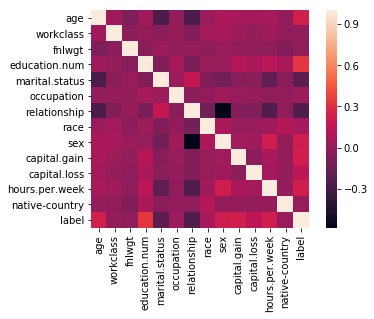

In [35]:
#correlation map to identify correlated features
sns.heatmap(corr,square=True)
plt.show()

From the above analysis we can determine that the education is the most important factor to determine the salary

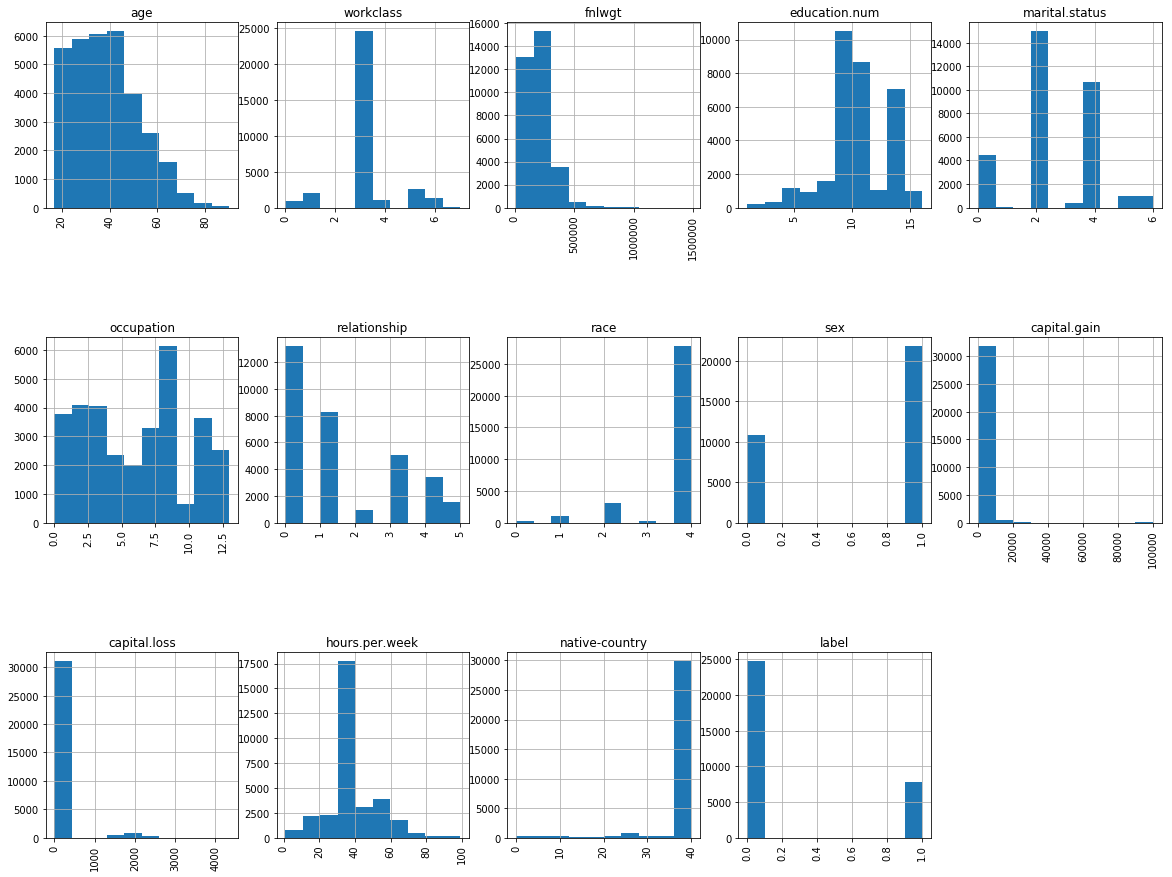

In [36]:
#Data Analysis of encoded data
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(df.shape[1]) / cols)
for i, column in enumerate(df.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    df[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

From the above histograms the following assumptions can be made from the dataset

* Most workers were private workers
* Most people in data were whites
* Most people worked around 40 hrs per week
* Data was mostly collected from united states


### Splitting the data and applying models - Part I

In [37]:
#split the data into train and test
#Scale the data so that mean is 0 and variance is 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype("float64")), columns=X_train.columns)
X_test=scaler.transform(X_test.astype("float64"))
#for calculating root mean squared error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

Accuracy: 82.5516471245%
F1 score: 0.555371
RMSE: 0.417712


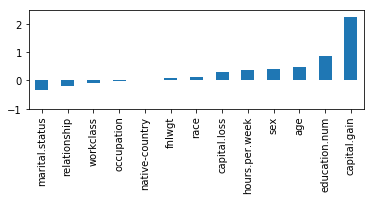

In [38]:
#training model on logistic regression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

print("Accuracy: %s%%" % (100*metrics.accuracy_score(y_test, y_pred)))
print ("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))
print("RMSE: %f"% rmse(y_test,y_pred))
coefs = pd.Series(classifier.coef_[0], index=X_train.columns)
cr=coefs.sort_values()

plt.subplot(2,1,2)
cr.plot(kind="bar")
axes=plt.gca()
axes.set_ylim([-1,2.5])
plt.show()



For above results as we can see, capital gain, education num, age, sex contribute positively to have income greater than 50k and marital status,relationship affect negatively.

But since these once categorical values have values ranging between 0-9, the numbers would be considered by the model as the higher the better.

There should be no bias as they are just representations. This could be solved using one hot encoding.


### One Hot Encoding 

In [39]:
#re read and preprocess the data as above data is modified
df1 = pd.read_csv("adult.csv")
del df1["education"]
df1 = df1.replace('?',np.NaN)
df1= df1.replace(' ?', np.NaN)
df1 = df1.fillna(np.nan)
df1 = df1[df1['native-country'] != "Holand-Netherlands"]
df1['native-country'] = df1['native-country'].replace(np.NaN , mode(df1['native-country']))
df1['occupation'] = df1['occupation'].replace(np.NaN , mode(df1['occupation']))
df1['workclass'] = df1['workclass'].replace(np.NaN ,  mode(df1['workclass']))

#use get dummies to generaate binary features.
bd = pd.get_dummies(df1)
bd.head()



,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,label_<=50K,label_>50K
0,90,77053,9,0,4356,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1,82,132870,9,0,4356,18,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,66,186061,10,0,4356,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,54,140359,4,0,3900,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,41,264663,10,0,3900,40,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [40]:
#modify the label as it would also get converted into binary feature.
bd["label"]= bd["label_>50K"]

#Deleting fields to escape dummy variable trap
del bd["label_>50K"]
del bd["label_<=50K"]
bd.head() 

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,label
0,90,77053,9,0,4356,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,82,132870,9,0,4356,18,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,66,186061,10,0,4356,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [41]:
#Function for confusion matrix and ROC curve
def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

Due to One Hot encoding the total number of features have increased to 88

### Splitting Data and applying models - Part II 

In [42]:
validation_size = 0.30
seed = 7

X_train, X_test, y_train, y_test = train_test_split(bd.iloc[:,:-1], bd.iloc[:,-1],test_size=validation_size,random_state=seed)

### Model Fitting 

#### Logistic Regression

In [43]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)
y_pred_lr = logistic_reg.predict(X_test)
y_pred_lr_train = logistic_reg.predict(X_train)

print("Model Accuracy with Logistic Regression: %s%%" % (100*metrics.accuracy_score(y_test, y_pred_lr)))
#print("Train Set Accuracy: %s%%" % (100*metrics.accuracy_score(y_train, y_pred_lr_train)))

Model Accuracy with Logistic Regression: 79.524979525%


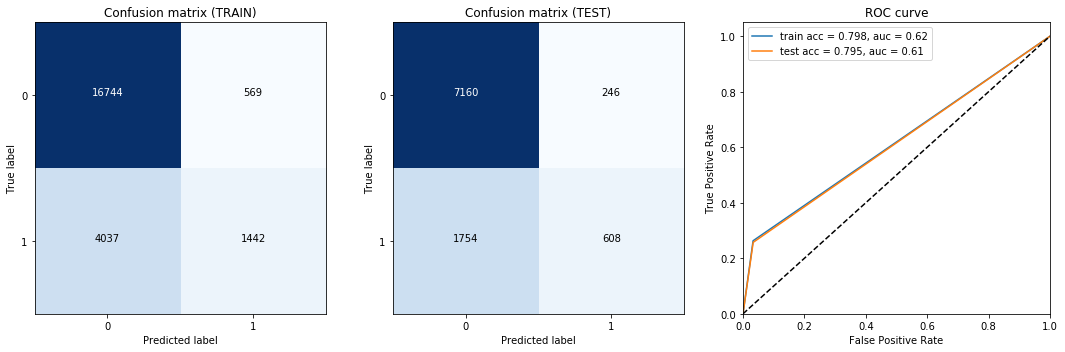

In [44]:
threshold = 0.5

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_pred_lr_train, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_pred_lr,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_pred_lr_train, y_test, y_pred_lr, threshold)
    
plt.tight_layout()
plt.show()

#### Decision Tree

In [45]:
regr_dt = tree.DecisionTreeClassifier(max_depth=10)
regr_dt.fit(X_train, y_train)
y_pred_dt= regr_dt.predict(X_test)
y_pred_dt_train = regr_dt.predict(X_train)

print("Model Accuracy with Decision Tree: %s%%" % (100*metrics.accuracy_score(y_test, y_pred_dt)))
#print("Train Set Accuracy: %s%%" % (100*metrics.accuracy_score(y_train, y_pred_dt_train)))

Model Accuracy with Decision Tree: 85.647010647%


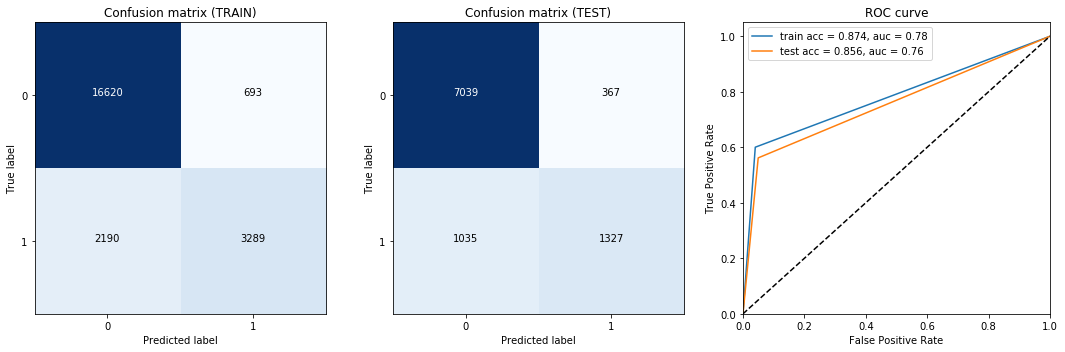

In [46]:
threshold = 0.5

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_pred_dt_train, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_pred_dt,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_pred_dt_train, y_test, y_pred_dt, threshold)
    
plt.tight_layout()
plt.show()

#### Random Forest

In [47]:
random_forest = RandomForestClassifier(n_estimators=500,max_features=10)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
predictions_train = random_forest.predict(X_train)

print("Model Accuracy with Random Forest: %s%%" % (100*metrics.accuracy_score(y_test, predictions)))
#print("Train set Accuracy: %s%%" % (100*metrics.accuracy_score(y_train, predictions_train)))


Model Accuracy with Random Forest: 85.217035217%


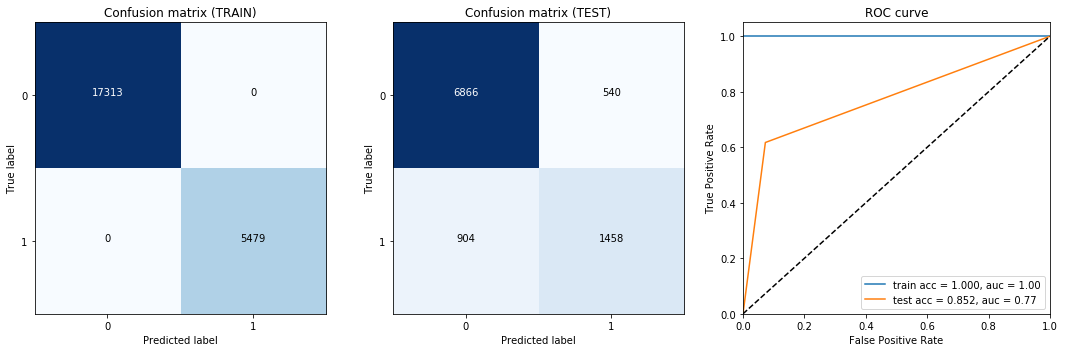

In [48]:
threshold = 0.5

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, predictions_train, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, predictions,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, predictions_train, y_test, predictions, threshold)
    
plt.tight_layout()
plt.show()

#### Gradient Boosting

In [49]:
GradientBoosting = GradientBoostingClassifier(max_depth=5, n_estimators=500)
GradientBoosting.fit(X_train,y_train)
predictor_gb=GradientBoosting.predict(X_test)
predictor_train_gb=GradientBoosting.predict(X_train)

print("Model Accuracy with Gradient Boosting: %s%%" % (100*metrics.accuracy_score(y_test, predictor_gb)))
#print("Train Set Accuracy: %s%%" % (100*metrics.accuracy_score(y_train, predictor_train_gb)))

Model Accuracy with Gradient Boosting: 87.0495495495%


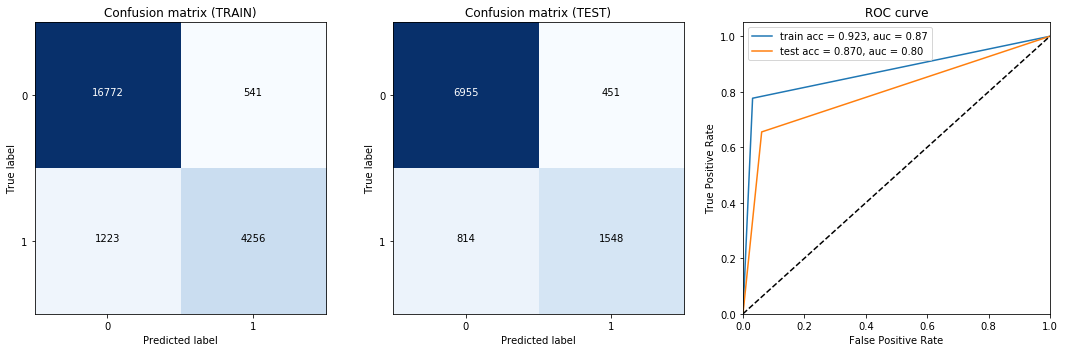

In [50]:
threshold = 0.5

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, predictor_train_gb, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, predictor_gb,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, predictor_train_gb, y_test, predictor_gb, threshold)
    
plt.tight_layout()
plt.show()

## Validation Of Models

### Evaluating with Validation set 

In [51]:
#Preprocess the data as above data
df_val = pd.read_csv("adult.test.csv")
del df_val["education"]
#del df_val["fnlwgt"]

df_val = df_val.replace(' ?',np.NaN)
df_val = df_val.fillna(np.nan)
df_val['label'] = df_val['label'].replace(' <=50K.' ,' <=50K')
df_val['label'] = df_val['label'].replace(' >50K.' ,' >50K')
df_val['native-country'] = df_val['native-country'].replace(np.NaN , mode(df_val['native-country']))
df_val['occupation'] = df_val['occupation'].replace(np.NaN , mode(df_val['occupation']))
df_val['workclass']=df_val['workclass'].replace(np.NaN,mode(df_val['workclass']))

#use get dummies to generaate binary features.
bd1 = pd.get_dummies(df_val)

#modify the label as it would also get converted into binary feature.
bd1["label"]= bd1["label_ >50K"]
del bd1["label_ >50K"]
del bd1["label_ <=50K"]

X1_test= bd1.iloc[:,:-1]
y1_test= bd1.iloc[:,-1]


### Model Performance on Validation set

In [52]:
#Logistic Regression

predictor_validation = logistic_reg.predict(X1_test)
print("Validation Set Accuracy for Logistic Regression: %s%%" % (100*metrics.accuracy_score(y1_test, predictor_validation)))

Validation Set Accuracy for Logistic Regression: 79.9213807506%


In [53]:
#Decision Tree Classifier

predictor_validation = regr_dt.predict(X1_test)
print("Validation Set Accuracy for Decision Tree Classifier: %s%%" % (100*metrics.accuracy_score(y1_test, predictor_validation)))

Validation Set Accuracy for Decision Tree Classifier: 85.7134082673%


In [54]:
#Random Forest Classifier

predictor_validation = random_forest.predict(X1_test)
print("Validation Set Accuracy for Random Forest Classifier: %s%%" % (100*metrics.accuracy_score(y1_test, predictor_validation)))

Validation Set Accuracy for Random Forest Classifier: 85.4308703397%


In [55]:
#Gradient Boosting

predictor_validation = GradientBoosting.predict(X1_test)
print("Validation Set Accuracy for Gradient Boosting: %s%%" % (100*metrics.accuracy_score(y1_test, predictor_validation)))

Validation Set Accuracy for Gradient Boosting: 87.0831030035%


Our Models are performing similarly on test set as well as valdation set. This confirms there is no overfitting of data.

Also Ensemble Methods performed well compared to logistic regression. Specially gradient boosting gave us the best accuracy.